## Generate weak labels - watershed algorithm

- Goal: Automatically generate weak labels to segment LV and LA in A2C view. 
- Method:
    - 1st step - Speckle noise reduction. Bilateral filter was applied to echo images for speckle noise reduction, facilitating the watershed segmentation. We adopt the strategy of using bilateral filtering with a high value for geometric closeness (σs = 15) to estimate the value of the pixels at the locations where edges in the image were not well defined. In this way, we can take a weighted average of pixel values in a greater neighborhood which are made up of existing and missing pixels to perform an edge-based interpolation to estimate the missing values. 
    - 2nd step - Watershed segmentation. After speckle noise reduction a distance transform and the watershed algorithm were applied to segment the chambers of the A2C view and to separate the touching objects, i.e. left ventricle and left atrium, in the images. 


In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from utils.util_seg import unsharp_mask, get_label_ws, cat_to_color

## Visualize watershed labels

1.0 17.740845 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


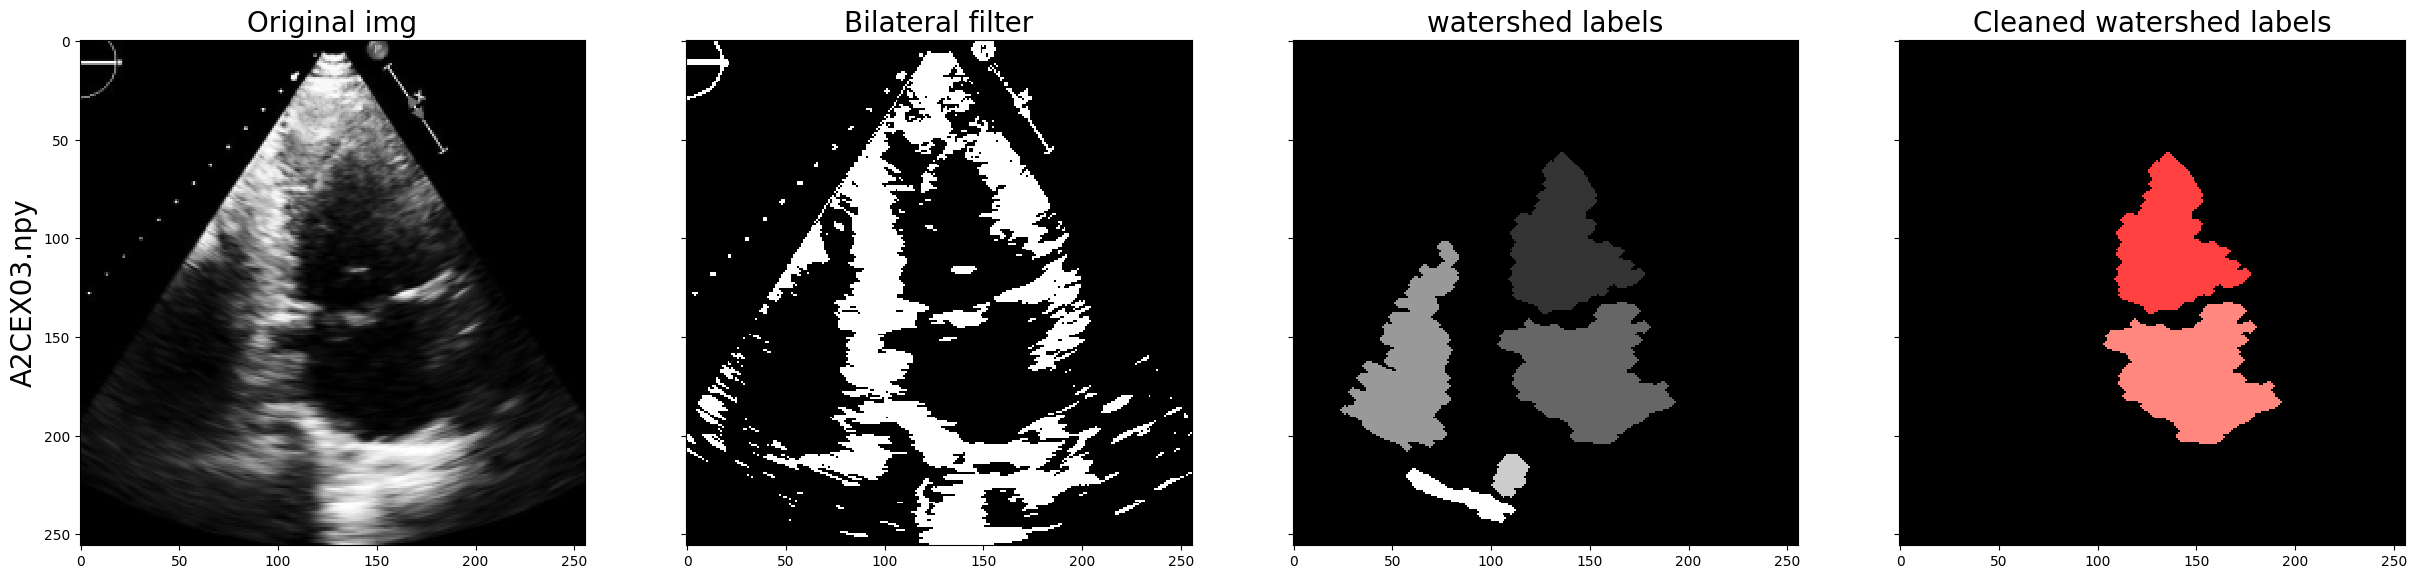

1.0 14.5367 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


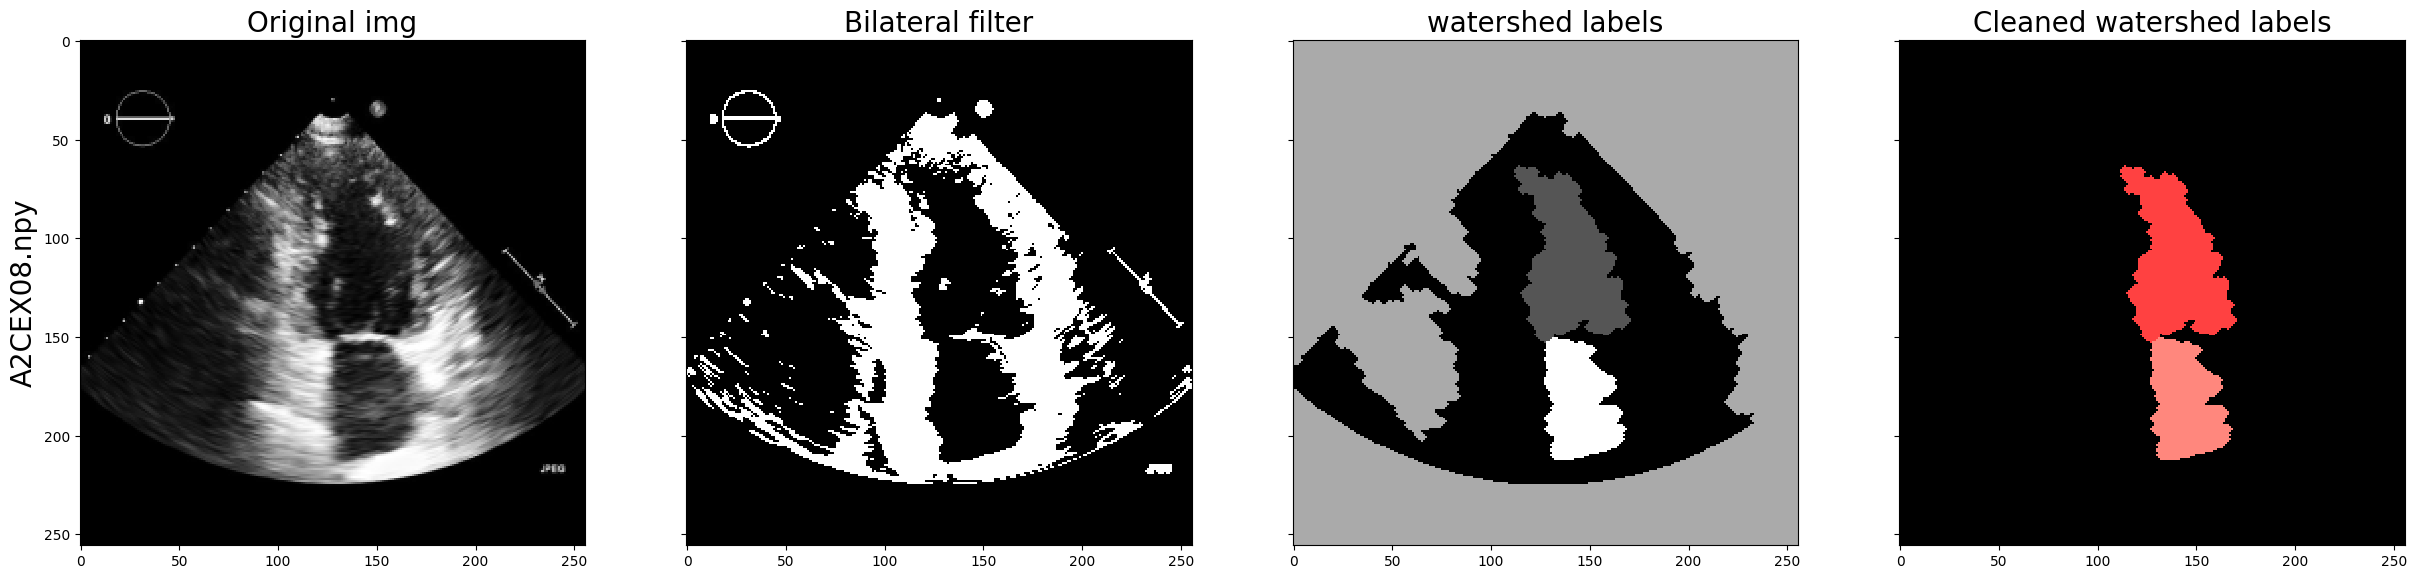

1.0 15.002304 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


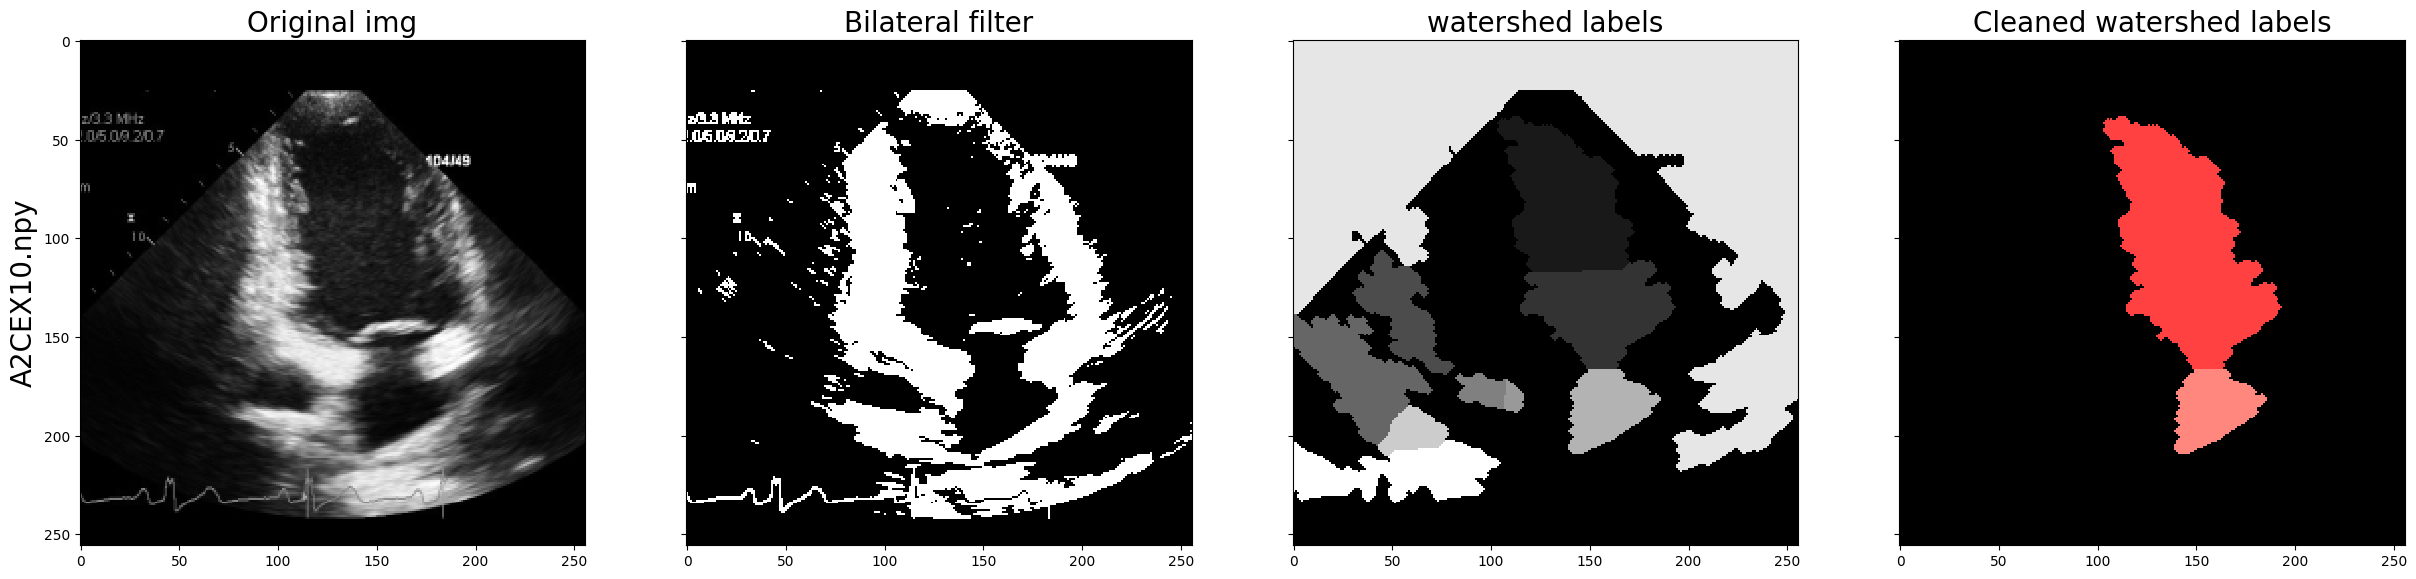

1.0 10.189348 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


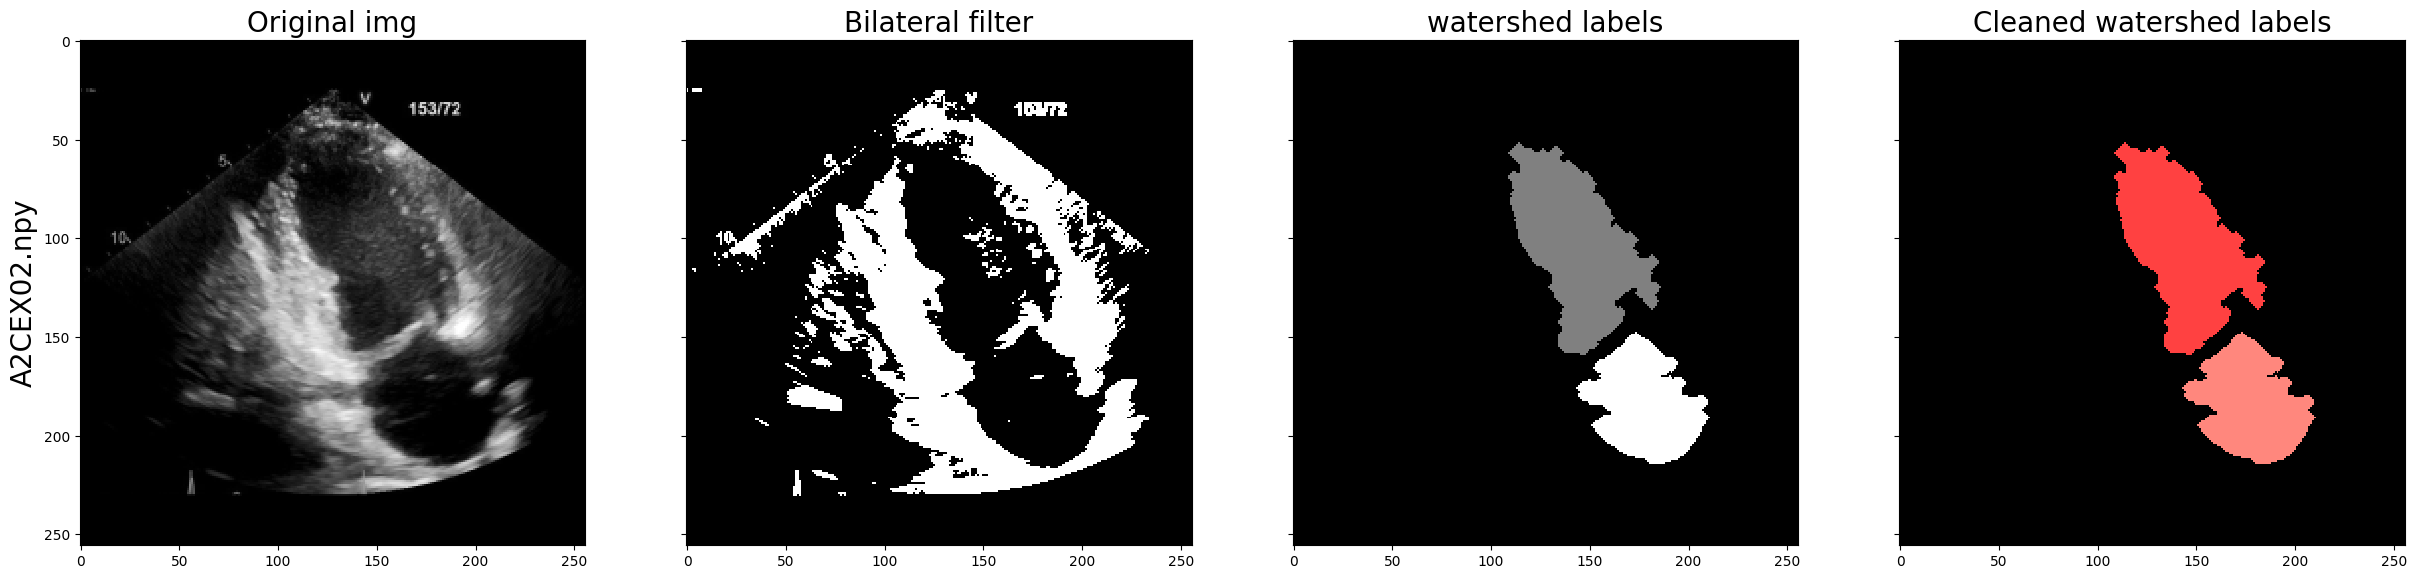

1.0 13.118351 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


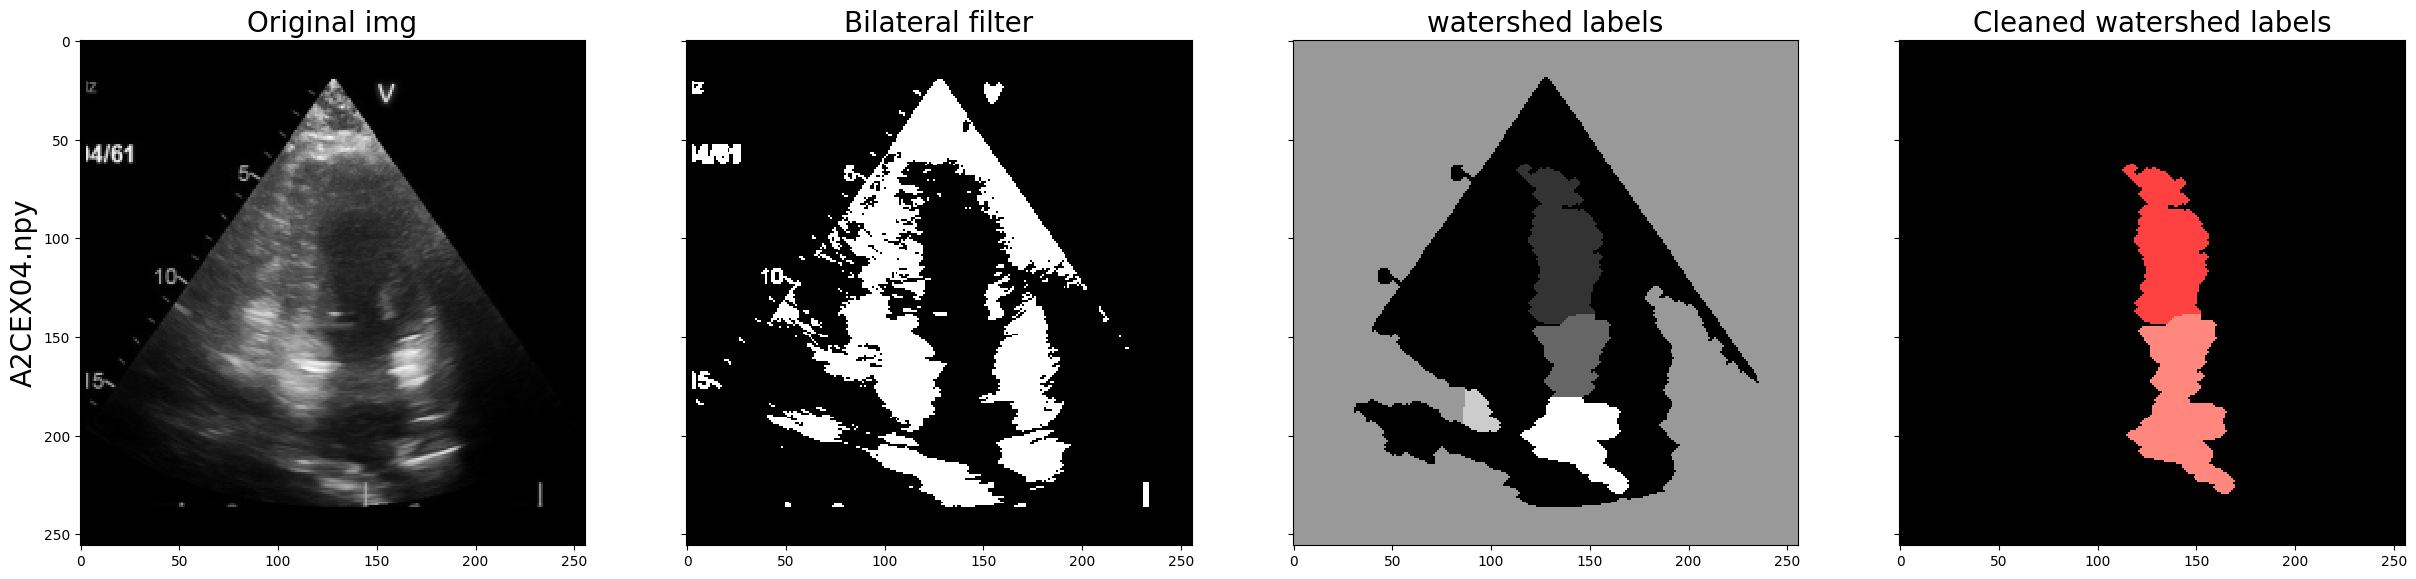

1.0 13.887604 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


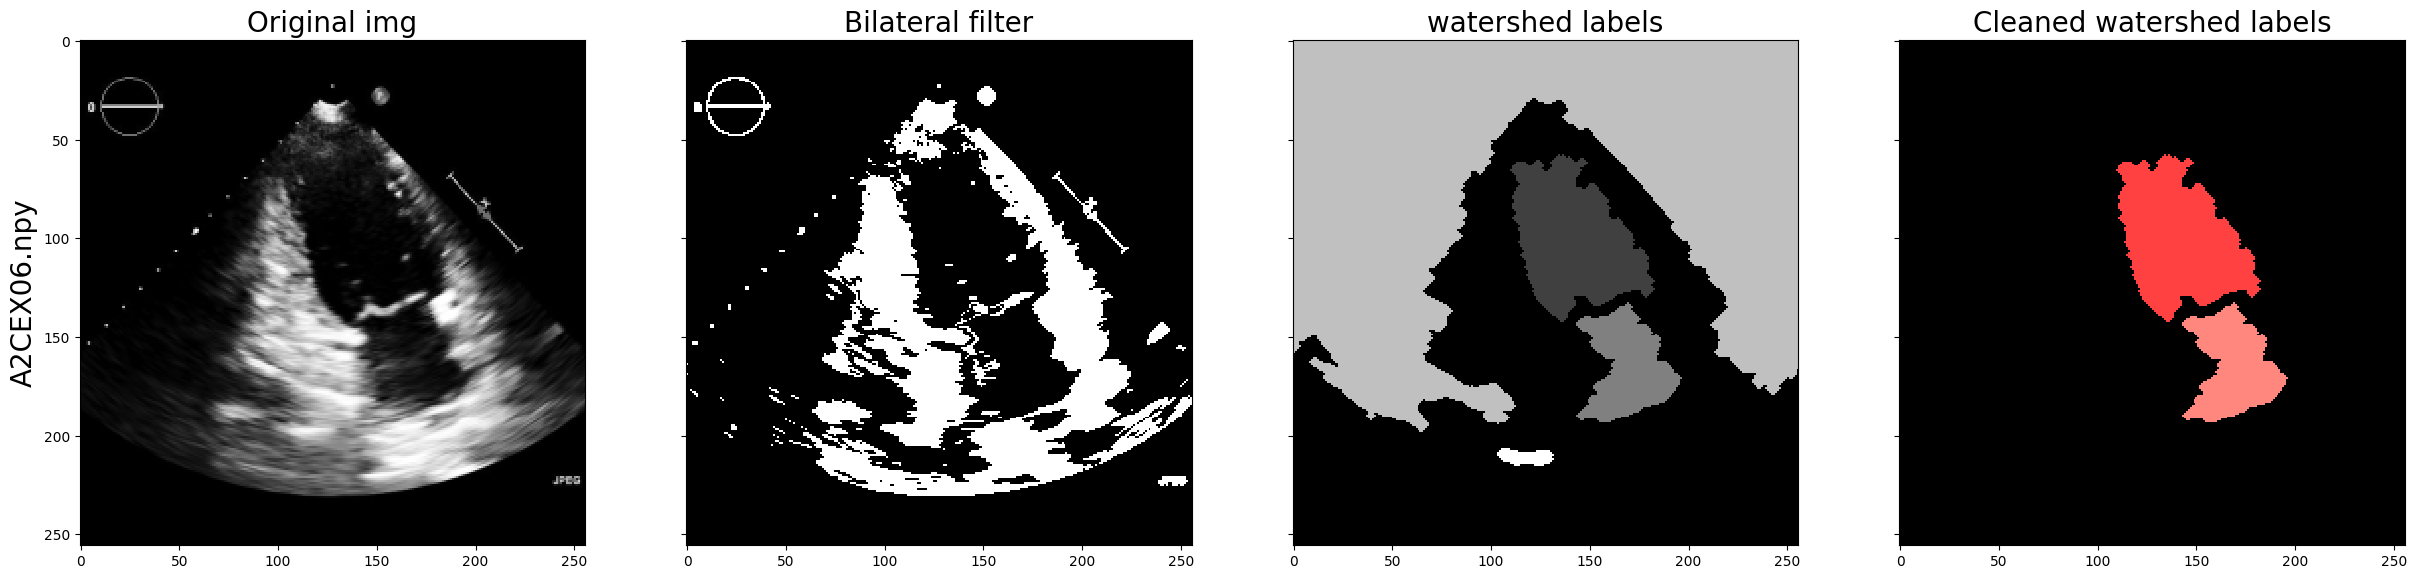

1.0 16.244333 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


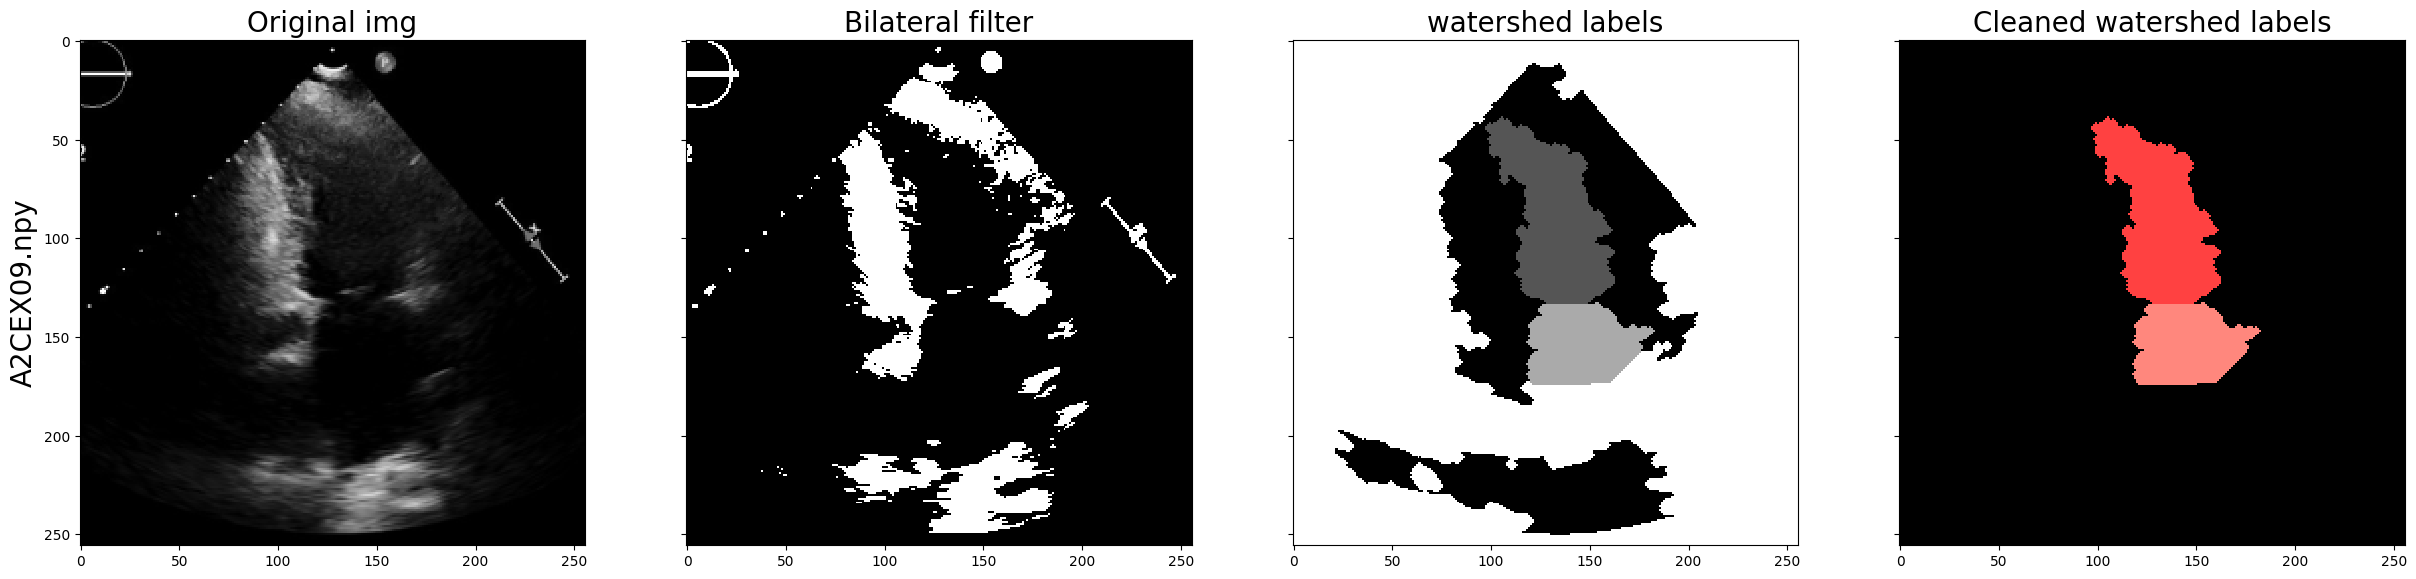

1.0 16.534657 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


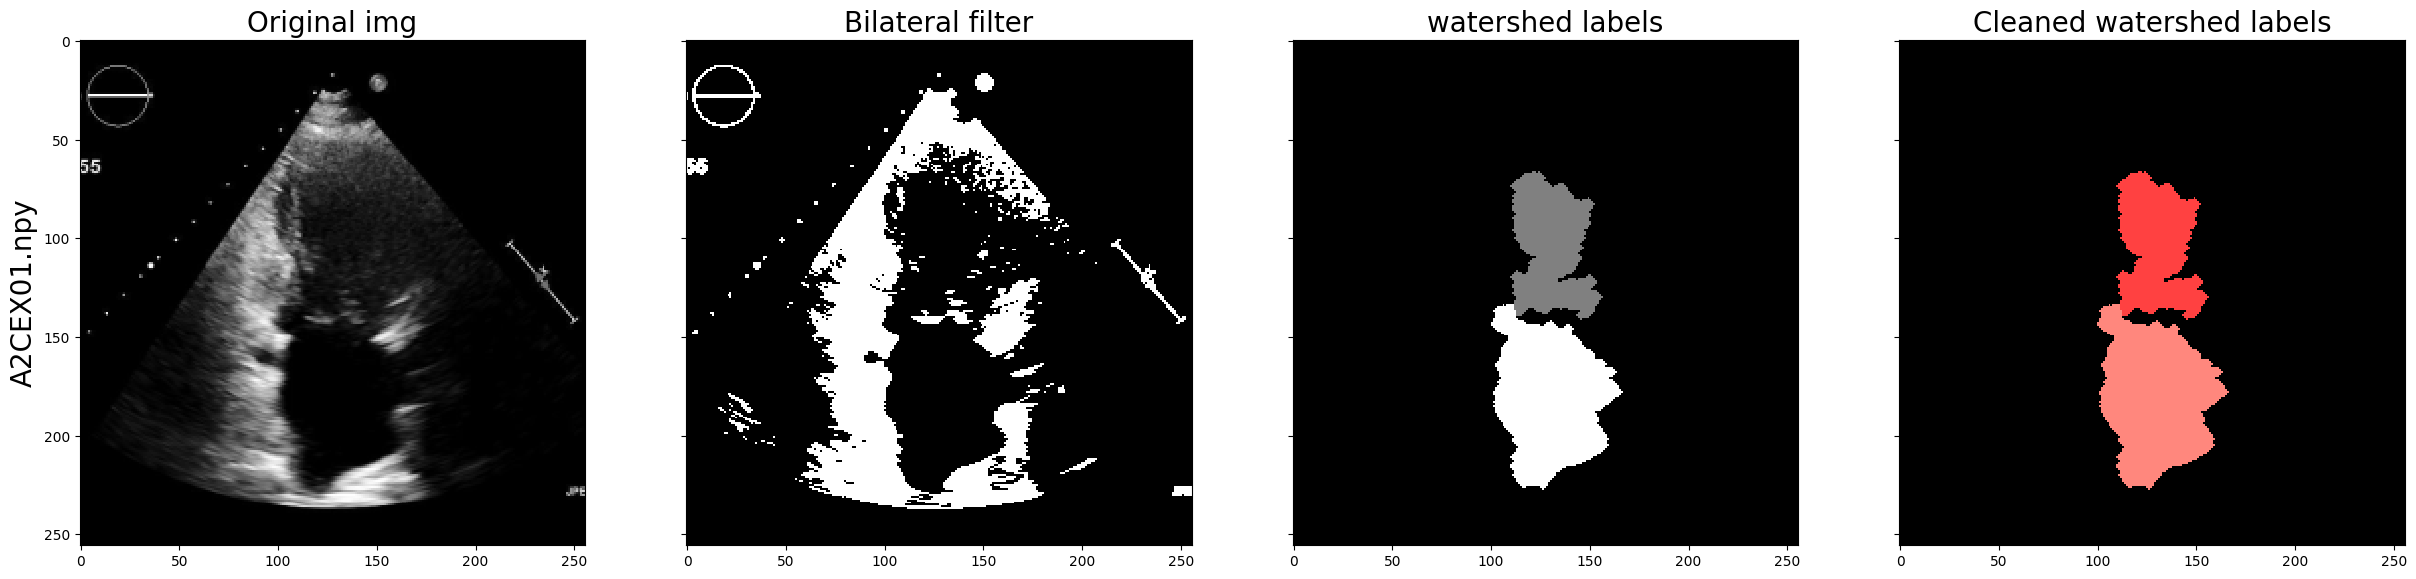

1.0 12.494779 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


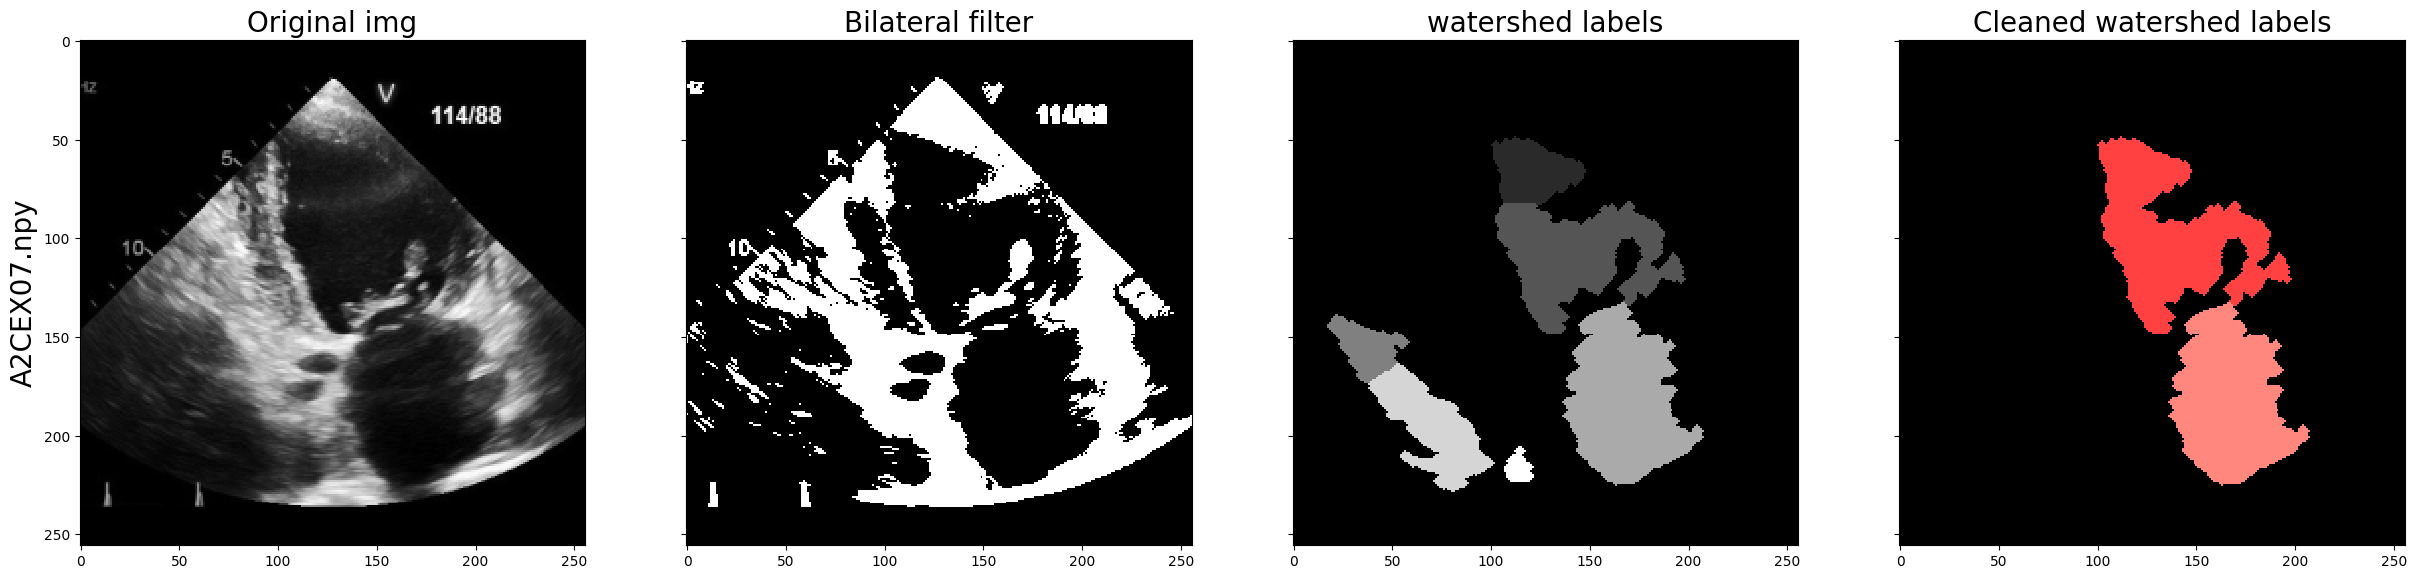

1.0 16.735334 1.0


/home/ec2-user/ssl-seg-model-cleaned/utils/util_seg.py:223: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_seg = morph.remove_small_holes(img_seg, 2000)


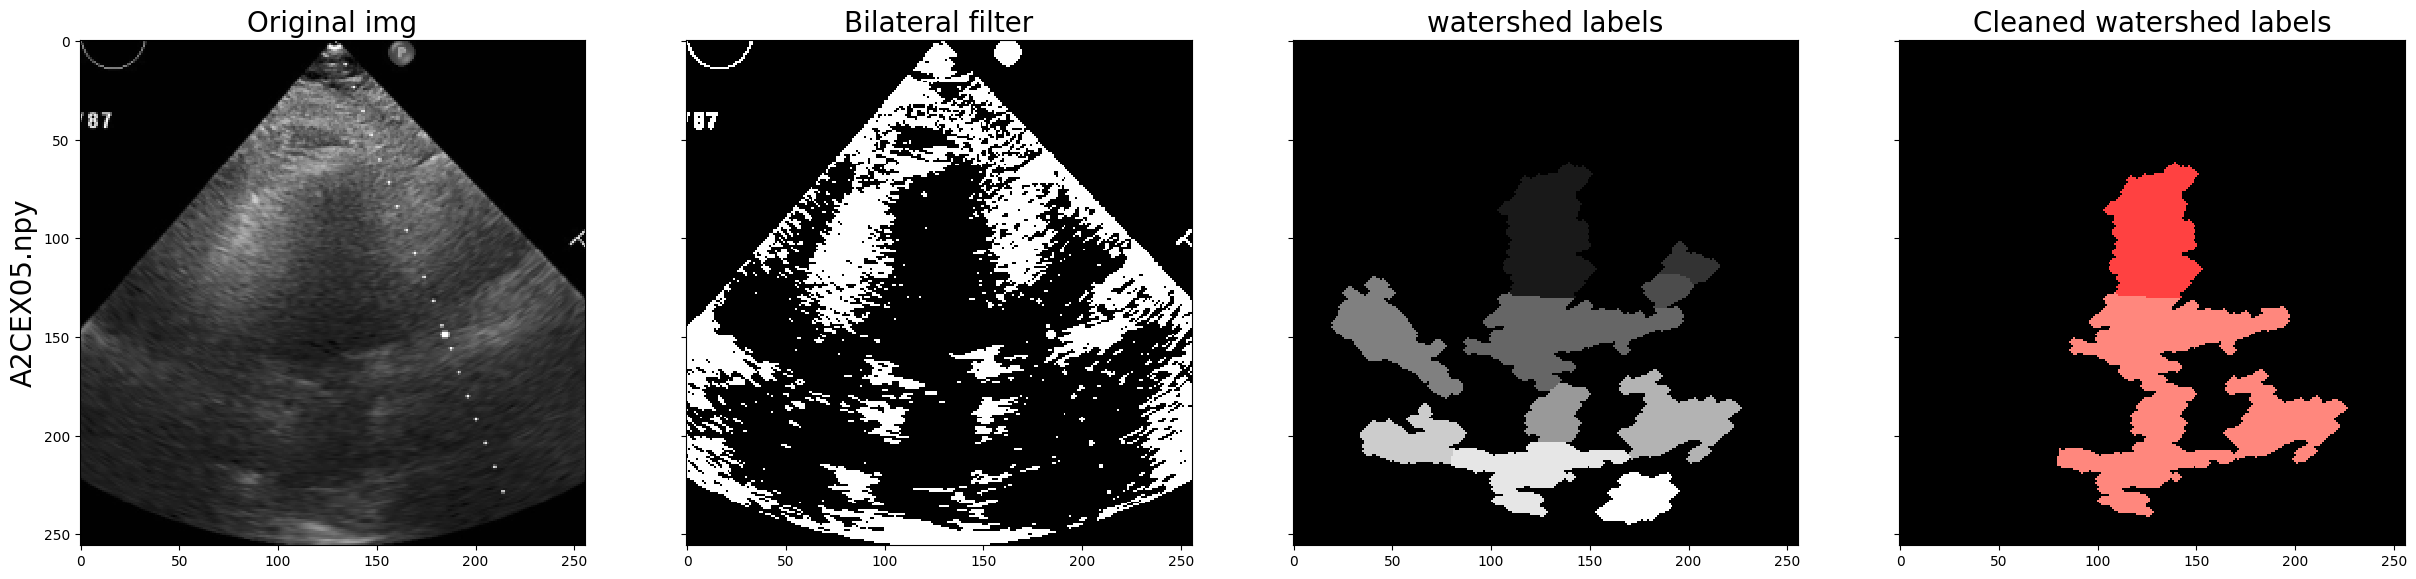

In [2]:
color_list_a2c = [(0,0,0), (255,135,125), (255,65,65)]
label_map_a2c = ["background", "left_atrium", "left_ventricle"]

watershed_df = pd.read_csv('example_data/A2C/a2c_watershed_labels_passed_qc.csv')
filenames = watershed_df['Image'].values
np.random.shuffle(filenames)

base_from = 'example_data/A2C/a2c_images'

plotted_IDs = []

for i in range(10):

    filename = filenames[i]

    img_fov = np.load(f'{base_from}/{filename}')
    img_256 = cv2.resize(img_fov, (256, 256), interpolation=cv2.INTER_AREA)
    img_normalized = ((img_256 - img_256.min()) / (img_256.max() - img_256.min())).astype('float32')
    img_gray = img_normalized[..., 0]

    img_bi = unsharp_mask(img_gray, 20, 20)

    img_ws, img_seg, img_prop, img_prop_cat, df_ws = get_label_ws(img_bi, 20, c=20, l=150, r=260)

    img_rgb = cat_to_color(img_prop_cat[np.newaxis].astype(int), color_list_a2c)

    fig, ax_arr = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(30, 20))
    ax1, ax2, ax3, ax4 = ax_arr.ravel()
    

    ax1.imshow(img_gray, cmap='gray')
    ax1.set_title(f'Original img', fontsize=20)
    ax1.set_ylabel(filename, fontsize=20)

    ax2.imshow(img_bi.astype('uint8'), cmap="gray")
    ax2.set_title(f'Bilateral filter', fontsize=20)

    ax3.imshow(img_ws, cmap="gray")
    ax3.set_title(f'watershed labels', fontsize=20)

    ax4.imshow(img_rgb[0].astype('uint8'),cmap='gray')
    ax4.set_title(f'Cleaned watershed labels', fontsize=20)

    plt.show()